<a href="https://colab.research.google.com/github/Zzmirror/Machine-learning-Basic-projects/blob/main/Regression/Linear_Regression_From_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression From scratch



> Loading data & visualize data



In [2]:
import pandas as pd

train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')


x_train , y_train = train_data["x"] , train_data["y"]

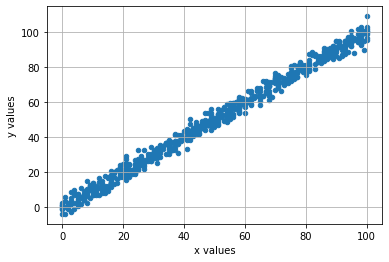

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, s = 20)
plt.grid()
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()



> Defining Model & Cost function & Gradient discent :

Model :
\begin{align}
    f(x) = wa+b
\end{align}

Cost function :

\begin{align}
J = \frac{1}{2m}\sum_{i=1}^n (h(x)^i - y^i)^2
\end{align}

Gradient discent :

\begin{align}
  w =w-a\cdot\frac{\partial J}{\partial w} := w -a\cdot\frac{1}{n}\sum_{i=1}^n (h(x)^i - y^i)x^i
  \end{align}	 
\begin{align}
  b =b-a\cdot\frac{\partial J}{\partial b}:= b -a\cdot\frac{1}{n}\sum_{i=1}^n (h(x)^i - y^i)
\end{align}


In [4]:
#Model or Predict 
def predict(x , w , b):
  return (w*x)+b

#Cost function :
def cost_function(x  , w , b , y ):

  n = len(x)
  y_predict = predict(x , w, b)
  total_error = sum(pow((y - y_predict) , 2))/(2*float(n))
  return total_error


#Gradient discent :
def gradient_discent(x , y , w , b , alpha ):
 
  n = len(x)

  y_predict = predict(x , w , b)
  error = y_predict - y
  d_w = sum(error*x)
  d_b = sum(error)

  new_w = w - (alpha* (1/float(n)) * d_w)
  new_b = b - (alpha* (1/float(n)) * d_b)

  return new_w , new_b


In [5]:
def train(x , y , w , b   , alpha ,n_iter):


  for i in range(n_iter):
    w , b = gradient_discent(x , y , w , b , alpha )

    if (i % 20 == 0):
      print("iteration:" , i , "Cost :" , cost_function(x  , w , b , y ))

  return w ,b 



In [6]:
w, b = train(x_train, y_train, 0.0, 0.0, 0.0001, 100)
print( "w : " , w , "b : " , b)

iteration: 0 Cost : 743.1419639041284
iteration: 20 Cost : 3.931000534405438
iteration: 40 Cost : 3.930935031326048
iteration: 60 Cost : 3.9309331540481676
iteration: 80 Cost : 3.9309312786546897
w :  0.9988617173559169 b :  0.01465683038447714


In [7]:
x = [0 , 10 , 45 , 15 , 6 , 77 , 80 , 100]

y = []
for i in range(len(x)) :
  y.append(predict(x[i] ,w ,b))



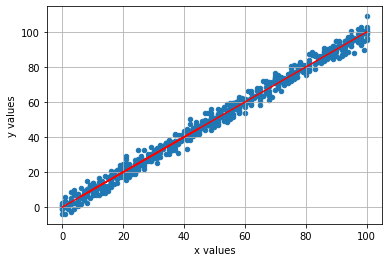

In [8]:
plt.scatter(x_train, y_train, s = 20)
plt.plot(x , y , color='r' )
plt.grid()
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

# Linear Regression with sklearn

In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error


model = LinearRegression()
X_train = np.array(x_train).reshape(-1 , 1)
model.fit(  X_train , np.array(y_train))

#Calculate intercept and coefficient
print("model b :" ,model.intercept_)
print("model w:" ,model.coef_)

model b : -0.10755938819391275
model w: [1.00069255]


In [11]:
x_test , y_test = test_data["x"] , test_data["y"]

pred=model.predict(np.array(x_test).reshape(-1 , 1))


new_x = [0 , 10 , 45 , 15 , 6 , 77 , 80 , 100]
new_y =model.predict(np.array(new_x).reshape(-1 , 1))

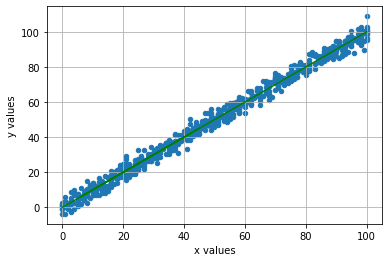

In [15]:
plt.scatter(x_train, y_train, s = 20)
# plt.plot(x , y , color='r' )
plt.plot(new_x , new_y , color='g' )
plt.grid()
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

In [16]:
print('MSE : ', mean_squared_error(y_test,pred.reshape(-1 ,1)))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,pred)))

MSE :  9.431064474444804
RMSE :  3.071003821952165
